## Last project
* evaluate the difference between data transformation techniques
* Is PCA better than Kernel PCA?
* Is silhouette score best metric do use, try different evaluation metrics and comment on the result
* try all unsupervised algorithms that you studied
* compare between EM and DBSCAN and isolated random forest as anomaly detection algorithm
justify all your chooses and comment on every result
* show how result of T-SNE differs with every choose you made   

### Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import IsolationForest

from sklearn.neighbors import NearestNeighbors

from sklearn.manifold import TSNE
 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

from plotnine import *

from sklearn.metrics import silhouette_samples, silhouette_score

import warnings
warnings.filterwarnings('ignore')

### EDA

In [2]:
CC_data = pd.read_csv("CC GENERAL.csv", index_col = "CUST_ID")
CC_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
CC_data.fillna(CC_data.median(),inplace = True)
CC_data.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [4]:
CC_data.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [5]:
CC_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CRED

### Scaling the data using min max scaler

In [6]:
minMax_scaler = MinMaxScaler()

In [7]:
sc_data = minMax_scaler.fit_transform(CC_data)

In [8]:
sc_df = pd.DataFrame(sc_data)
sc_df.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
dtype: int64

#### Power transformer

In [9]:
pt = PowerTransformer()
pt_data = pt.fit_transform(CC_data)

In [10]:
pt_df = pd.DataFrame(pt_data)
pt_df.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
dtype: int64

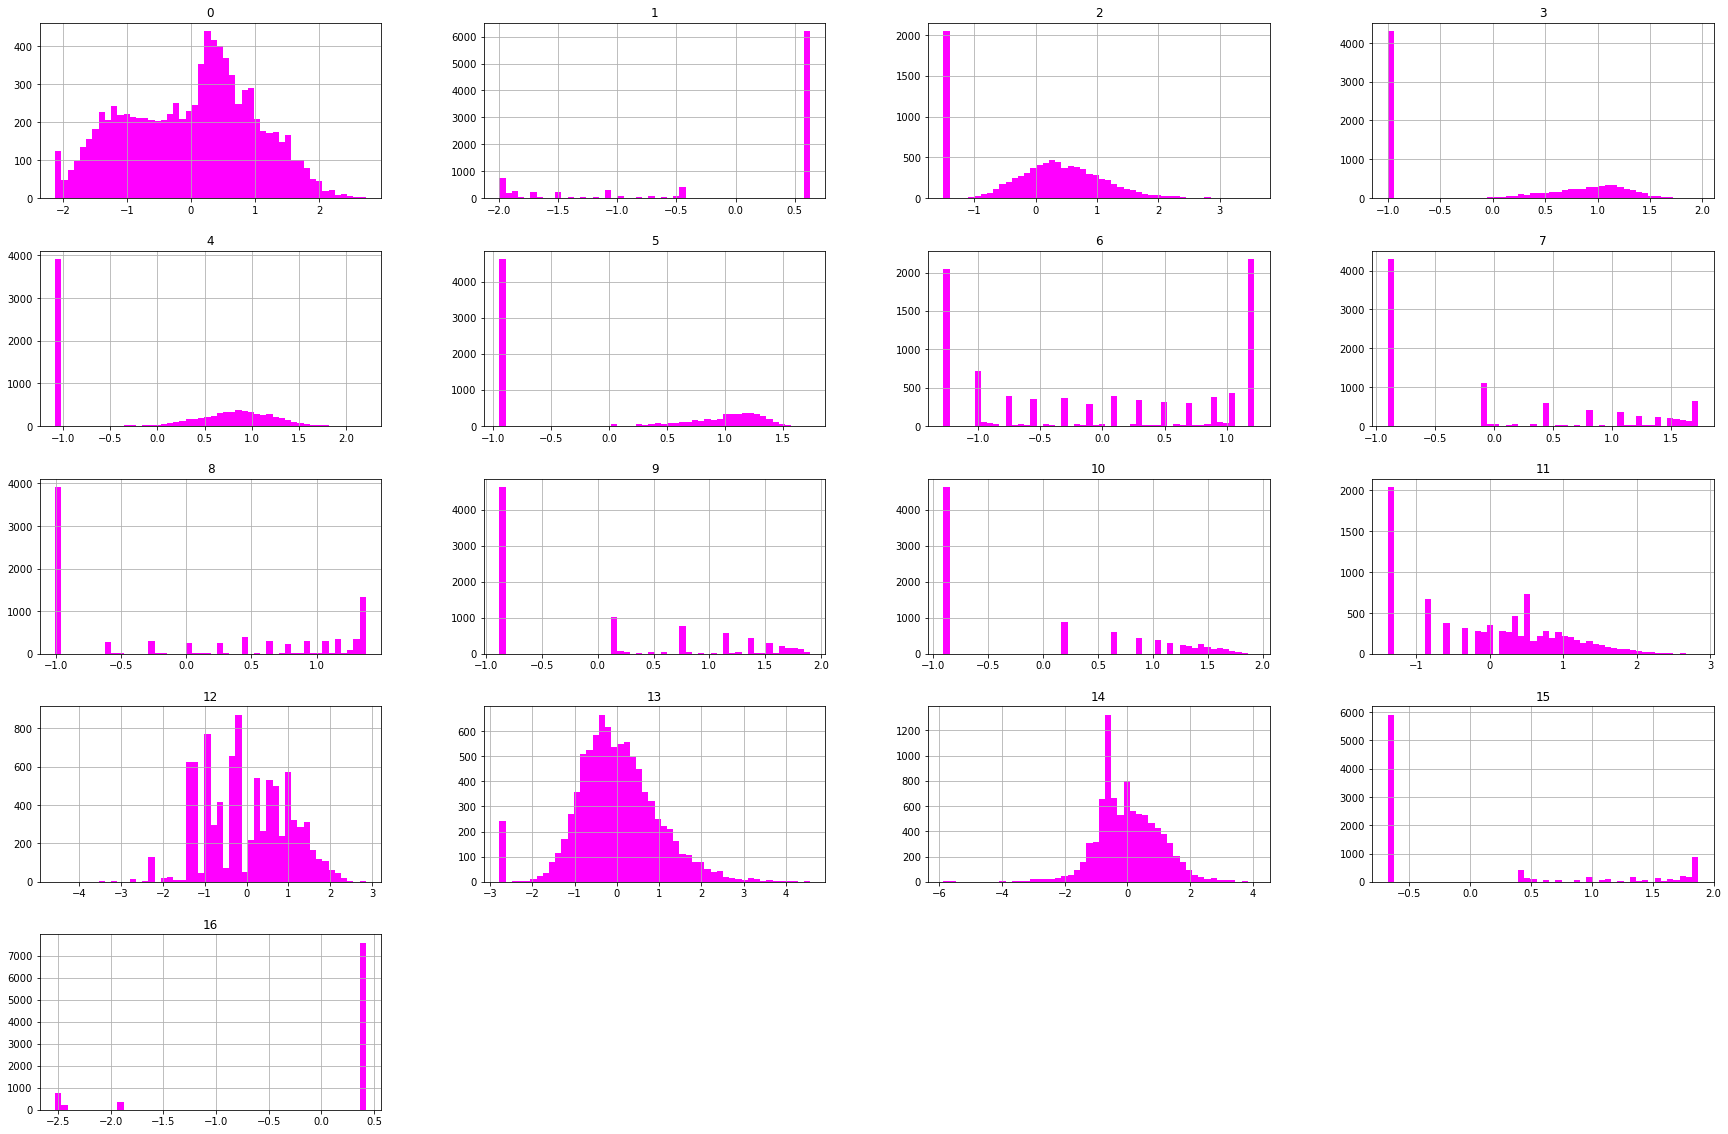

In [11]:
pt_df.select_dtypes(np.number).hist(bins = 50,figsize =(30,20),color='Magenta');

In [12]:
sc_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.002148,0.818182,0.001945,0.000000,0.00424,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.00000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0
2,0.131026,1.000000,0.015766,0.018968,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0
3,0.087521,0.636364,0.030567,0.036775,0.00000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.004088,0.000000,1.0
4,0.042940,1.000000,0.000326,0.000393,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0


##### Kmeans and T-sne function

In [13]:
def cluster_tsne(data , cluster_type = 'kmeans' ,text = 't-sne' ,num_clusters = 5):
    
    if cluster_type == 'kmeans':
        df = data.copy()
        
        #K_means cluster to extract the labels 
        Kmeans_object = KMeans(n_clusters = num_clusters , random_state=42)
        Kmeans_object.fit_transform(df)
        #labels extracted by k_means
        df["y"] = Kmeans_object.labels_
        print(df["y"].value_counts())
        
        
        #applying t-sne on data
        tsne = TSNE(n_components=2, verbose=0, perplexity=30, n_iter=300 , random_state=42)
        tsne_results = tsne.fit_transform(df)
        
        #Plot t-sne
        df['tsne-2d-one'] = tsne_results[:,0]
        df['tsne-2d-two'] = tsne_results[:,1]
        plt.figure(figsize=(16,10))
        sns.scatterplot(
        x="tsne-2d-one", y="tsne-2d-two",
        hue="y",
        palette=sns.color_palette("hls",num_clusters),
        data= df,
        legend="full",
        alpha=0.3
        ).set(title= text);
    
        
    elif cluster_type == "Agg_cluster":
        df = data.copy()
        #Agglomerative Clustering
        agg_cluster = AgglomerativeClustering()
        agg_cluster.fit(df)
        #labels extracted by k_means
        df['y'] = agg_cluster.labels_
        print(df["y"].value_counts())
        
        #applying t-sne on data
        tsne = TSNE(n_components=2, verbose=0, perplexity=30, n_iter=300 , random_state=42)
        tsne_results = tsne.fit_transform(df)
        
        #Plot t-sne
        df['tsne-2d-one'] = tsne_results[:,0]
        df['tsne-2d-two'] = tsne_results[:,1]
        plt.figure(figsize=(16,10))
        sns.scatterplot(
        x="tsne-2d-one", y="tsne-2d-two",
        hue="y",
        palette=sns.color_palette("hls",2),
        data= df,
        legend="full",
        alpha=0.3
        ).set(title= text);
        
    else:
        print('Please enter cluster type')
    

0    3577
1    2164
3    1191
4    1167
2     851
Name: y, dtype: int64


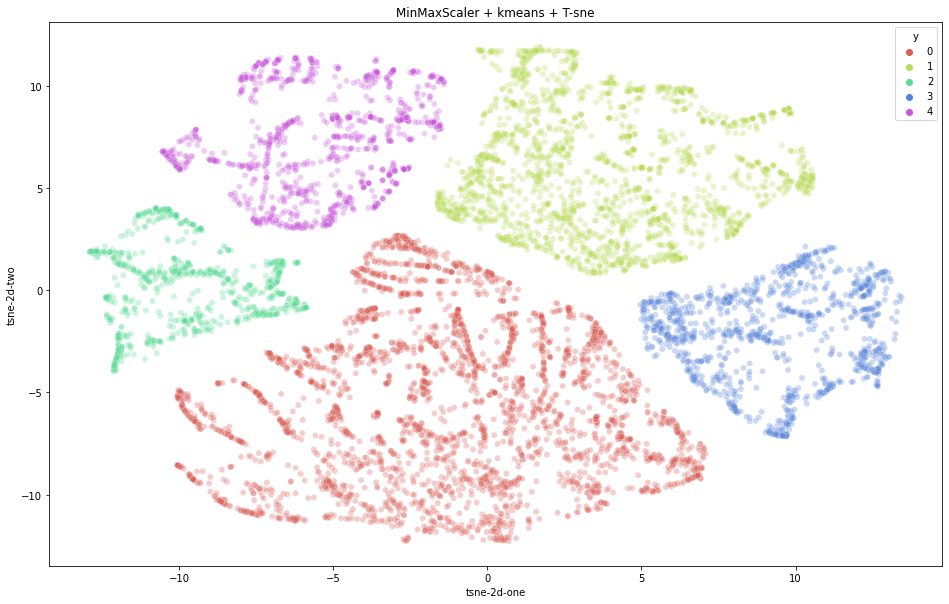

In [14]:
cluster_tsne(sc_df,'kmeans','MinMaxScaler + kmeans + T-sne')

0    4763
1    4187
Name: y, dtype: int64


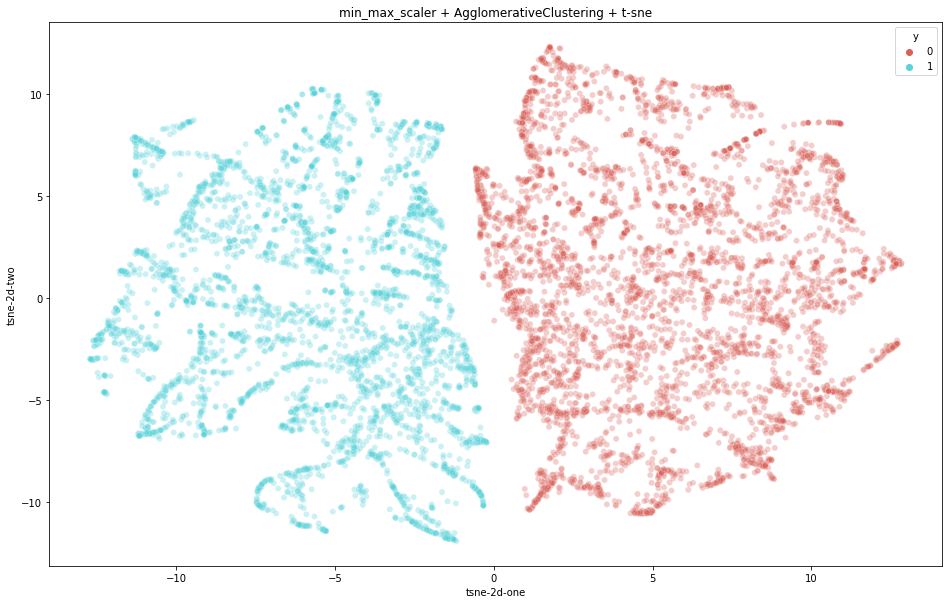

In [15]:
cluster_tsne(sc_df, "Agg_cluster" ,'min_max_scaler + AgglomerativeClustering + t-sne')

0    2498
1    1982
3    1552
2    1540
4    1378
Name: y, dtype: int64


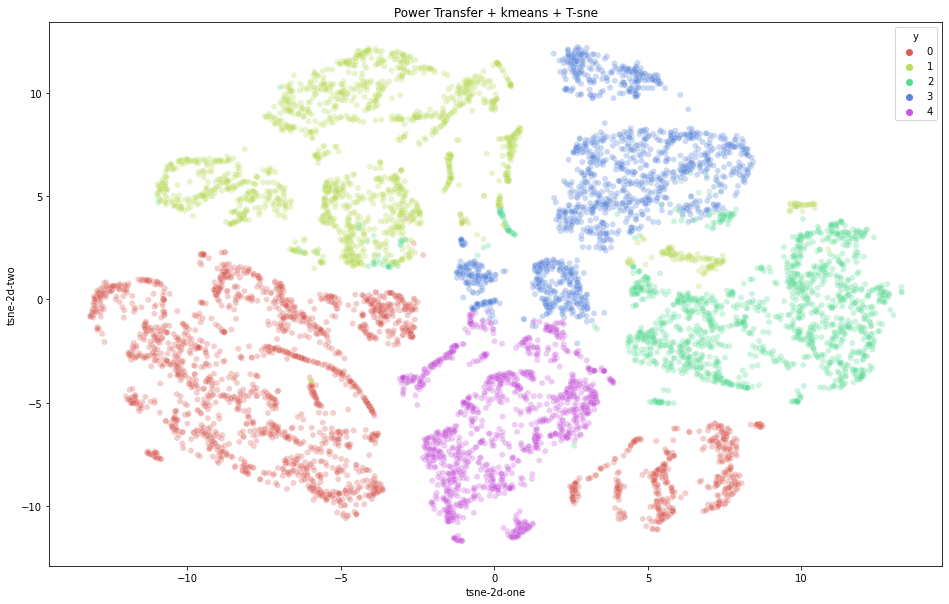

In [16]:
cluster_tsne(pt_df,'kmeans','Power Transfer + kmeans + T-sne',5)

1    4633
0    4317
Name: y, dtype: int64


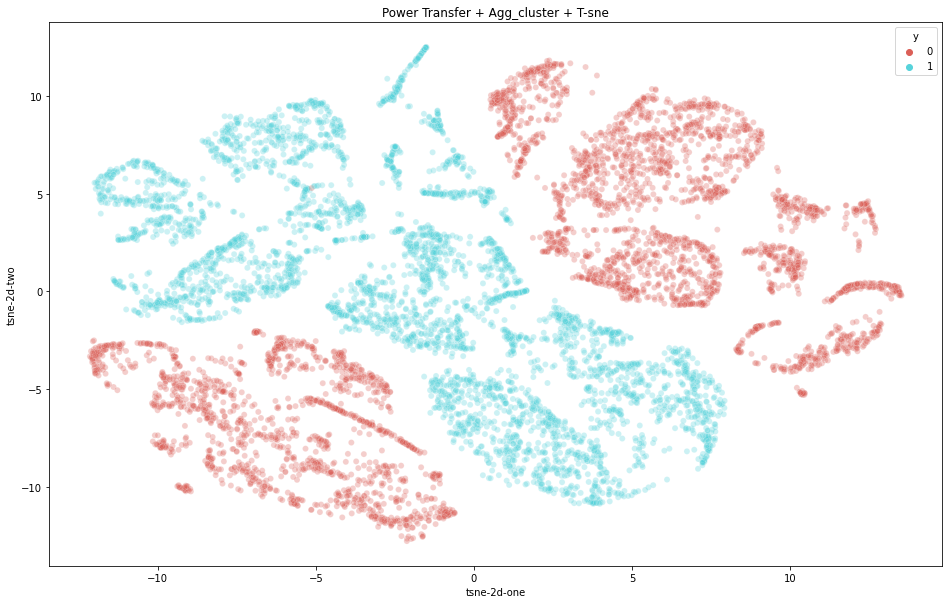

In [17]:
cluster_tsne(pt_df,"Agg_cluster",'Power Transfer + Agg_cluster + T-sne',5)

#### PCA

In [18]:
pca = PCA(n_components = 5)
new_data = pca.fit(sc_data)

In [19]:
print(new_data.explained_variance_ratio_)
print(new_data.singular_values_)

[0.49597096 0.14054119 0.12844606 0.07676852 0.06963551]
[54.25673671 28.88200675 27.6112419  21.34603096 20.33016614]


In [20]:
PCA_data = new_data.transform(sc_data)
PCA_data

array([[-0.48216769, -0.09765264, -0.04647341, -0.0582929 ,  0.10997883],
       [-0.60857495, -0.01937583,  0.08210922, -0.21874787, -0.09902401],
       [ 0.30450847,  0.92093391,  0.01220424,  0.1600326 ,  0.16232486],
       ...,
       [ 0.36038344, -0.42268649,  0.10586875,  0.74495162, -0.48029546],
       [-0.64610006, -0.20439151,  0.28175796,  0.63302334, -0.5711428 ],
       [-0.0946022 ,  0.39951371,  0.1959914 ,  1.01131734, -0.26496476]])

In [21]:
pca_df = pd.DataFrame(PCA_data)

1    3570
0    2159
2    1197
4    1178
3     846
Name: y, dtype: int64


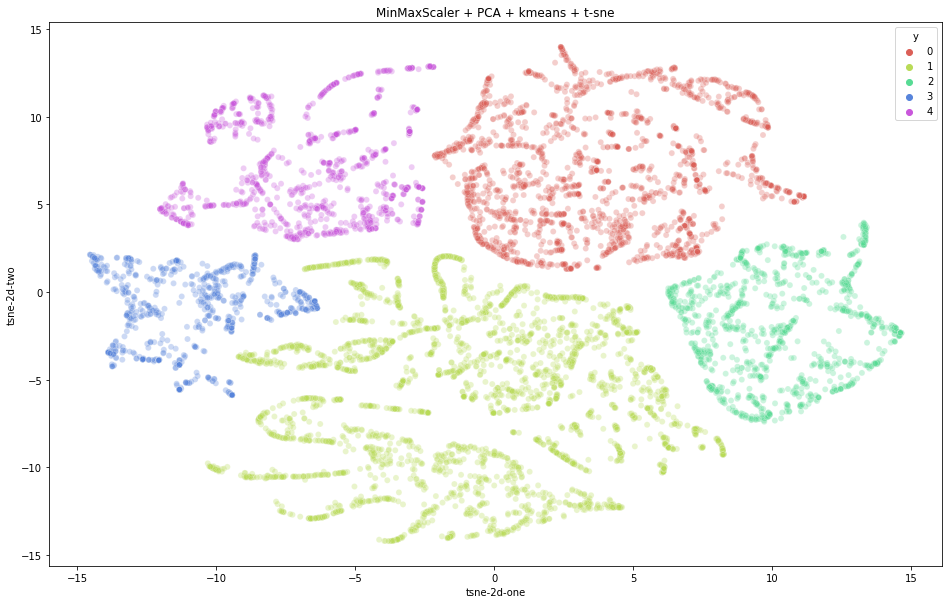

In [22]:
cluster_tsne(pca_df,'kmeans','MinMaxScaler + PCA + kmeans + t-sne')

0    4494
1    4456
Name: y, dtype: int64


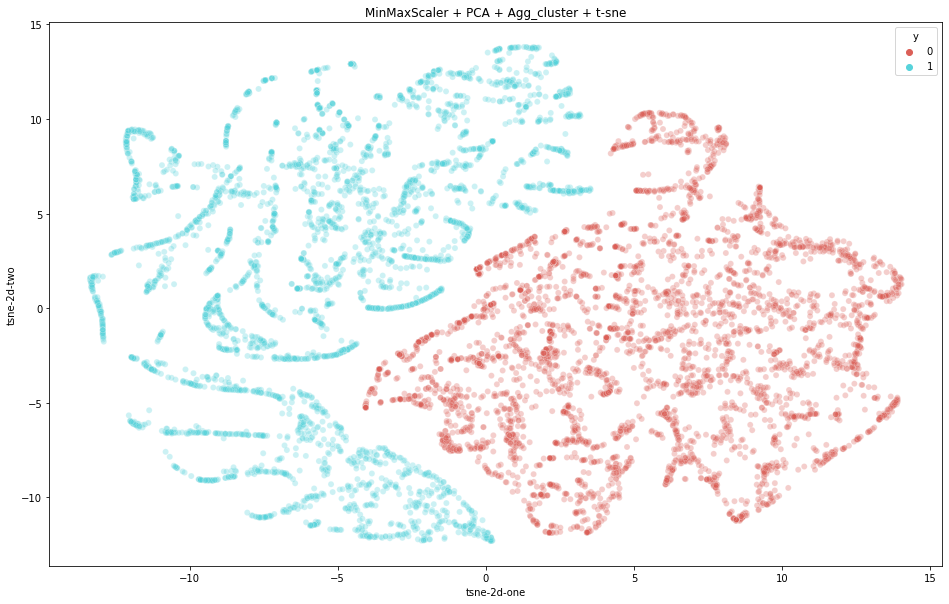

In [23]:
cluster_tsne(pca_df,'Agg_cluster','MinMaxScaler + PCA + Agg_cluster + t-sne')

#### kernel PCA
[kernel pca](https://www.bogotobogo.com/python/scikit-learn/scikit_machine_learning_Data_Compresssion_via_Dimensionality_Reduction_3-nonlinear-mappings-via-kernel-principal-component-analysis.php)

In [24]:
kpca= KernelPCA(n_components = 5, kernel = 'rbf')
x_kpca = kpca.fit_transform(sc_df)

In [25]:
kpca_df = pd.DataFrame(x_kpca)

2    3568
3    2147
4    1216
0    1187
1     832
Name: y, dtype: int64


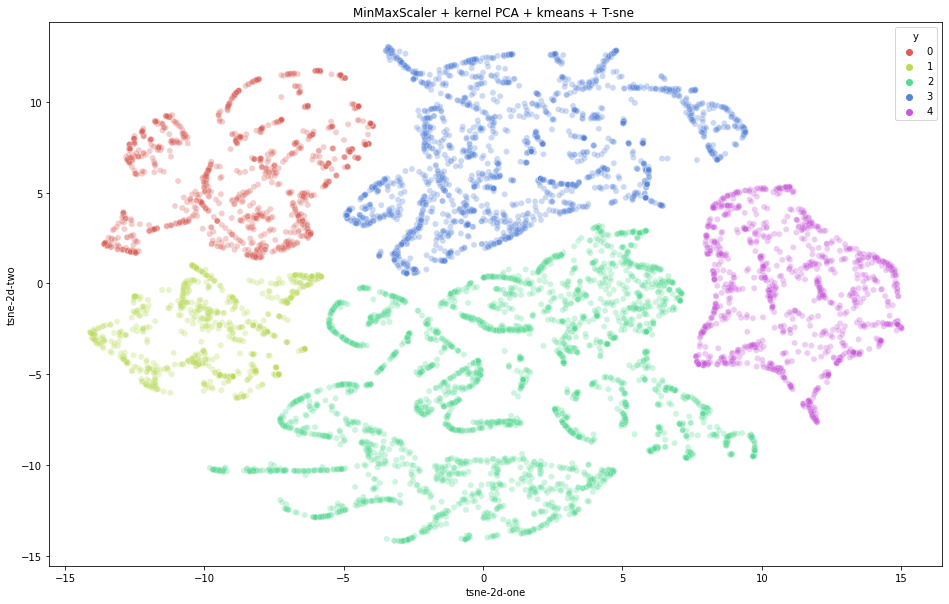

In [26]:
cluster_tsne(kpca_df,'kmeans','MinMaxScaler + kernel PCA + kmeans + T-sne ')

1    5244
0    3706
Name: y, dtype: int64


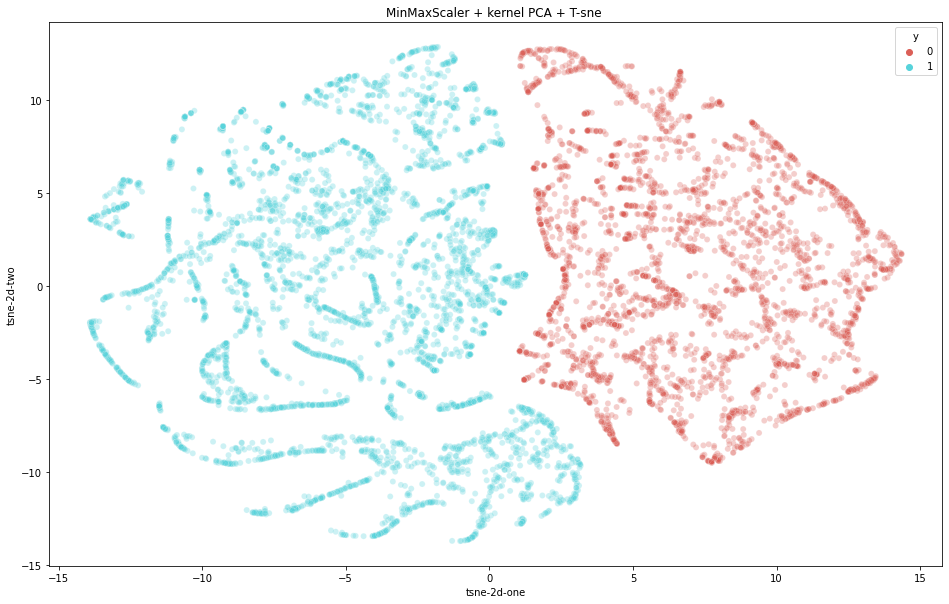

In [27]:
cluster_tsne(kpca_df,'Agg_cluster','MinMaxScaler + kernel PCA + T-sne ')

In [28]:
def t_sne(data,num_comp, text = 't-sne'):
    df = data.copy()
    tsne = TSNE(n_components=2, verbose=0, perplexity=30, n_iter=300 , random_state=42)
    tsne_results = tsne.fit_transform(df)
       
    #Plot t-sne
    df['tsne-2d-one'] = tsne_results[:,0]
    df['tsne-2d-two'] = tsne_results[:,1]
    plt.figure(figsize=(16,10))
    sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls",num_comp),
    data= df ,
    legend="full",
    alpha=0.3
    ).set(title= text);
    

### Isolation forest

In [29]:
sc_df_irf = sc_df.copy()

In [30]:
def t_sne_anomaly(data,anomaly = 'isolation forest' ,text = 't-sne'):
    
    df = data.copy()
    if anomaly == 'isolation forest':
        IRF = IsolationForest(random_state = 42).fit(df)
        IRF_pred = IRF.predict(df)
        IRF_pred
        
        df['y'] = IRF_pred
        print(df["y"].value_counts())
        
        tsne = TSNE(n_components=2, verbose=0, perplexity=30, n_iter=300 , random_state=42)
        tsne_results = tsne.fit_transform(df)
       
        #Plot t-sne
        df['tsne-2d-one'] = tsne_results[:,0]
        df['tsne-2d-two'] = tsne_results[:,1]
        plt.figure(figsize=(16,10))
        sns.scatterplot(
        x="tsne-2d-one", y="tsne-2d-two",
        hue="y",
        palette=sns.color_palette("hls",2),
        data= df ,
        legend="full",
        alpha=0.3
        ).set(title= text);

 1    8139
-1     811
Name: y, dtype: int64


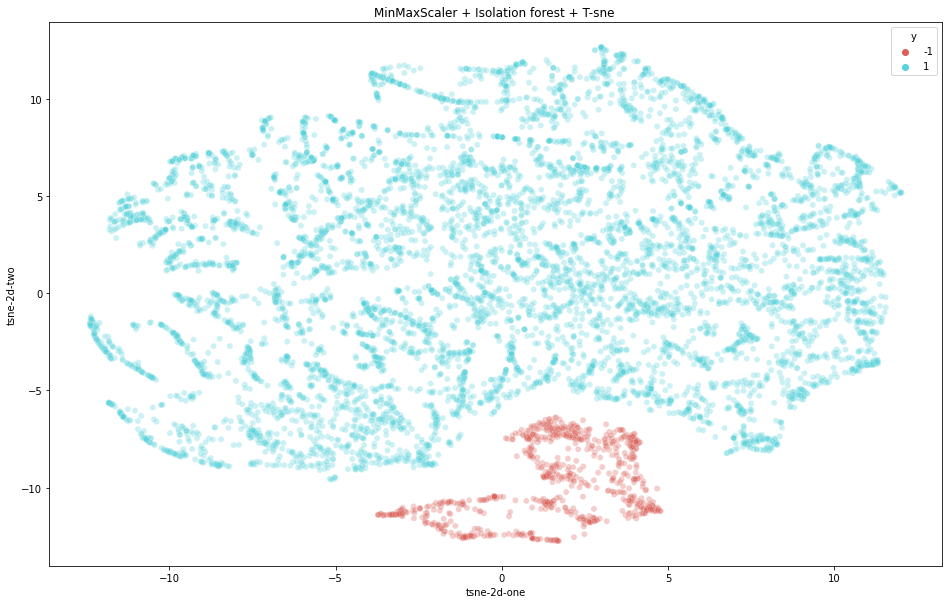

In [31]:
t_sne_anomaly(sc_df_irf,'isolation forest','MinMaxScaler + Isolation forest + T-sne ')

### DBSCAN

In [32]:
sc_dbscan = sc_df.copy()

In [33]:
len(sc_dbscan.columns)

17

In [34]:
# we ask for mins + 1 nearest, because the data point it self (distance = 0) is included
mins = 17
nn = NearestNeighbors(n_neighbors = mins + 1)
nn.fit(sc_dbscan)

distances, neighbors = nn.kneighbors(sc_dbscan)

distances

array([[0.00000000e+00, 9.03342052e-02, 1.14131792e-01, ...,
        1.82703430e-01, 1.83288542e-01, 1.87157000e-01],
       [0.00000000e+00, 1.64241824e-01, 1.73680207e-01, ...,
        1.98630659e-01, 2.07421216e-01, 2.07548593e-01],
       [0.00000000e+00, 5.58209689e-02, 6.66048966e-02, ...,
        1.14793519e-01, 1.17529482e-01, 1.18762700e-01],
       ...,
       [2.10734243e-08, 2.02923978e-01, 2.32318632e-01, ...,
        3.44016388e-01, 3.44068440e-01, 3.48173459e-01],
       [0.00000000e+00, 1.81251474e-01, 1.97945585e-01, ...,
        3.03343523e-01, 3.09620015e-01, 3.10888111e-01],
       [2.10734243e-08, 2.28072082e-01, 2.93452843e-01, ...,
        4.31709406e-01, 4.42941268e-01, 4.44237720e-01]])

In [35]:
# sort the distances
distances = np.sort(distances[:, mins], axis = 0)

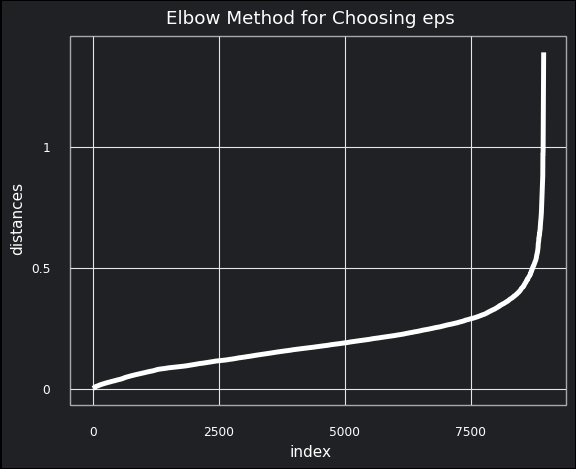

<ggplot: (124286402404)>

In [36]:
#plot the distances
distances_df = pd.DataFrame({"distances": distances,
                             "index": list(range(0,len(distances)))})
plt = (ggplot(distances_df, aes(x = "index", y = "distances")) +
 geom_line(color = "white", size = 2) + theme_minimal() +
 labs(title = "Elbow Method for Choosing eps") +
 theme(panel_grid_minor = element_blank(),
      rect = element_rect(fill = "#202124ff"),
      axis_text = element_text(color = "white"),
      axis_title = element_text(color = "white"),
      plot_title = element_text(color = "white"),
      panel_border = element_line(color = "darkgray"),
      plot_background = element_rect(fill = "#202124ff")
      ))
ggsave(plot=plt, filename='elbow.png', dpi=300)

plt

In [37]:
df = sc_df.copy()
db_clust = DBSCAN(eps=0.4, min_samples=18).fit(df)